In [16]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df_merged = pd.merge(df_clinical,df_mouse,on='Mouse ID',how='left')

# Display the data table for preview
df_merged.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [17]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_grouped = df_merged.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
tumor_mean = df_grouped.mean()

# Convert to DataFrame
tumor_mean = tumor_mean.reset_index()

# Preview DataFrame
tumor_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [18]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_stderr = df_grouped.sem()

# Convert to DataFrame
df_tumor_stderr = pd.DataFrame(tumor_stderr)

# Preview DataFrame
df_tumor_stderr.reset_index(inplace=True)
df_tumor_stderr.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [19]:
# Minor Data Munging to Re-Format the Data Frames
df_tumorpivot = tumor_mean.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
df_tumorpivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


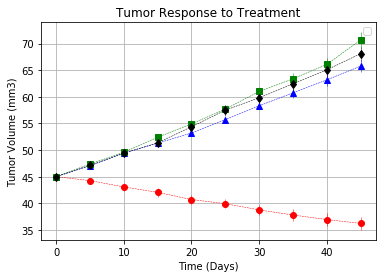

In [30]:
# Generate the Plot (with Error Bars)
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in drug_format_list:
    stderr = tumor_stderr[drug]
    treat_plt = plt.errorbar(df_tumorpivot.index,df_tumorpivot[drug],stderr,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)

plt.legend(loc='Best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

# Save the Figure
plt.savefig("Tumor Response")

In [35]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df_group_met= df_merged.groupby(['Drug','Timepoint'])['Metastatic Sites']
df_met_avg = df_group_met.mean()
# Convert to DataFrame
df_met_avg = df_met_avg.reset_index()
# Preview DataFrame
df_met_avg.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [32]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_stderr= df_group_met.sem()

# Convert to DataFrame
met_stderr_df = pd.DataFrame(met_stderr)

# Preview DataFrame
met_stderr_df.reset_index(inplace=True)
met_stderr_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [33]:
# Minor Data Munging to Re-Format the Data Frames
df_met_avg = df_met_avg.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
df_met_avg.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


No handles with labels found to put in legend.


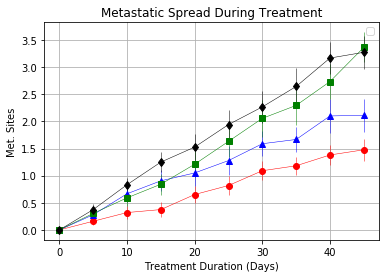

In [49]:
# Generate the Plot (with Error Bars)
for drug,marker,colors in drug_format_list:
    stderr = met_stderr[drug]
    met_treat_plt = plt.errorbar(df_met_avg.index,df_met_avg[drug],stderr,
                                       fmt=marker,ls='-',color=colors,linewidth=0.5)

# Show the Figure
plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()

# Save the Figure
plt.savefig('Met Spread During Treat')

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [41]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df_mousegroup = df_merged.groupby(['Drug','Timepoint'])['Mouse ID']
df_mouse_count = df_mousegroup.nunique()
df_mouse_count = pd.DataFrame(df_mouse_count)

# Convert to DataFrame
df_mouse_count.reset_index(inplace=True)
df_mouse_count = df_mouse_coun.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
df_mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [46]:
# Minor Data Munging to Re-Format the Data Frames
df_mousepivot = df_mouse_count.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame
df_mousepivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


No handles with labels found to put in legend.


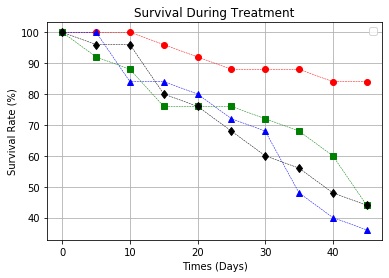

In [48]:
# Generate the Plot (Accounting for percentages)
for drug,marker,colors in drug_format_list:
    mouse_total = df_mousepivot[drug][0]
    survival_rate = (df_mousepivot[drug]/mouse_total)*100
    treat_survival_plt = plt.plot(df_mousepivot.index,survival_rate,
                                       marker=marker,ls='-',color=colors,linewidth=0.5)

# Show the Figure
plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig('Mouse Survival Treatment.png')
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [51]:
# Calculate the percent changes for each drug
pct_change = (df_tumorpivot.iloc[-1]/(df_tumorpivot.iloc[0])-1)*100

# Display the data to confirm
pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

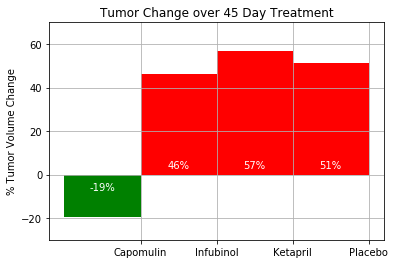

In [59]:
# Store all Relevant Percent Changes into a Tuple
pct_change_tup, = [pct_change]

# Splice the data between passing and failing drugs
drug_pass = pct_change < 0
# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
list_chg = [(pct_change[drug])for drug in drug_list]
plt_chg = plt.bar(drug_list,list_chg,width=-1,align='edge',color=drug_pass.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(plt_chg)

# Save the Figure
plt.savefig('Tumor After 45 Days.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [61]:
##Drug Treat Response Analysis

1 - Capomulin has demonstrated the greatest efficacy preventing volume change
in the tumor and guaranteeing the greatest survival rate.
2 - Ketapril seems to further deteriorate the condition of the mouse as it performs worse than the placebo
in terms of volume change and spread.
3 - Capomulin is the only drug that has passed according to the subset in place during our analysis
even though other drugs in the data have obtained passing results (Ramicane).
